# Iris Classification

# Introduction

![](iris_flower.png)

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id

- SepalLengthCm

- SepalWidthCm

- PetalLengthCm

- PetalWidthCm

- Species

# Imports and Data Load

In [1]:
#Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn import preprocessing

In [54]:
# read raw data
path = 'D:/Data_science/Iris_Flower/'
raw_data = pd.read_csv(os.path.join(path, 'data/iris.data'))

raw_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Preprocessing

In [3]:
#Copying raw data to modify it
data = raw_data

#Target map to use the new labels in algorithms
target_map = {'Iris-setosa':0, 
              'Iris-versicolor':1,
              'Iris-virginica':2 }

#Apply the target map to Data
data['species'] = data['species'].apply(lambda x: target_map[x])


data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# data size
data.shape

(150, 5)

In [5]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# describe data rounding values
round(data.describe(),3)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199,1.000
std,0.828,0.434,1.764,0.763,0.819
min,4.300,2.000,1.000,0.100,0.000
25%,5.100,2.800,1.600,0.300,0.000
50%,5.800,3.000,4.350,1.300,1.000
75%,6.400,3.300,5.100,1.800,2.000
max,7.900,4.400,6.900,2.500,2.000


In [7]:
# to display n. of samples on each class
data['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

# Data Visualization

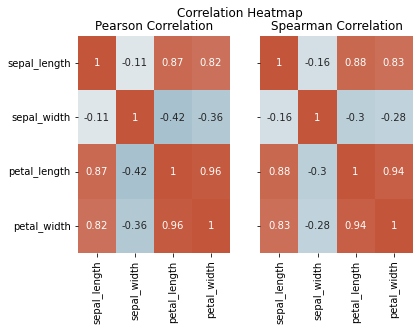

In [8]:
### Heatmap for Pearson and Spearman Correlation for data 

# color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#creating subplot
f,(ax1,ax2) = plt.subplots(1,2,sharey=True) # share_y
f.suptitle('Correlation Heatmap')

# Pearson
data_corr_pearson = data.iloc[:,0:4].corr(method ='pearson')

g1 = sns.heatmap(data_corr_pearson,cmap=cmap,cbar=False,ax=ax1, annot=True, vmin=-1, vmax=1)
g1.set_ylabel('')
g1.set_xlabel('')
g1.title.set_text( "Pearson Correlation" )

# Spearman
data_corr_spearman = data.iloc[:,0:4].corr(method ='spearman')

g2 = sns.heatmap(data_corr_spearman,cmap=cmap,cbar=False,ax=ax2, annot=True, vmin=-1, vmax=1)
g2.set_ylabel('')
g2.set_xlabel('')
g2.title.set_text( "Spearman Correlation" )


plt.show()

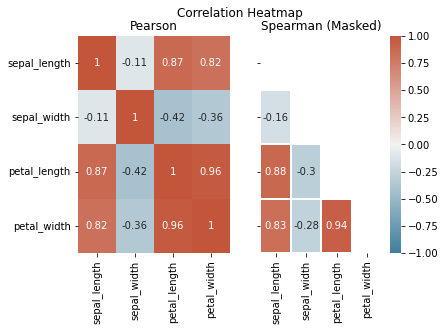

In [53]:
### Heatmap for Pearson and Spearman Correlation for data 

# color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#creating subplot
f,(ax1,ax2) = plt.subplots(1,2,sharey=True) # share_y
f.suptitle('Correlation Heatmap')

# Pearson
data_corr_pearson = data.iloc[:,0:4].corr(method ='pearson')

g1 = sns.heatmap(data_corr_pearson,cmap=cmap,cbar=False,ax=ax1, annot=True, vmin=-1, vmax=1)
g1.set_ylabel('')
g1.set_xlabel('')
g1.title.set_text( "Pearson" )

# Spearman
data_corr_spearman = data.iloc[:,0:4].corr(method ='spearman')
# One side mask
mask = np.triu(np.ones_like(data_corr_spearman, dtype=bool))

g2 = sns.heatmap(data_corr_spearman, mask=mask, 
                    xticklabels=data_corr_spearman.columns, 
                    yticklabels=data_corr_spearman.columns, 
                    annot=True, linewidths=.2, 
                    cmap=cmap, 
                    vmin=-1, vmax=1)


g2.set_ylabel('')
g2.set_xlabel('')
g2.title.set_text( "Spearman (Masked)" )


plt.show()

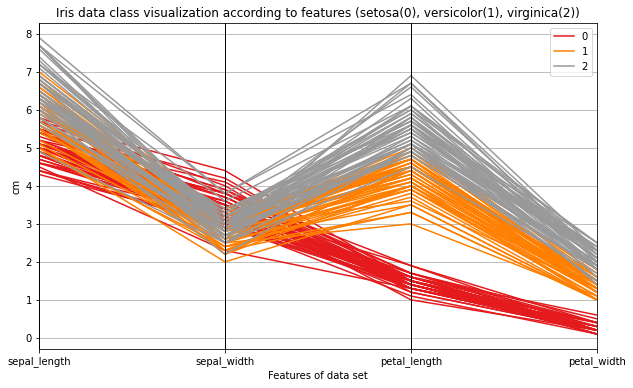

In [9]:
from pandas.plotting import parallel_coordinates

## Parallel coordinates for features values for each specie

plt.figure(figsize=(10,6))
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features (setosa(0), versicolor(1), virginica(2))")
plt.xlabel("Features of data set")
plt.ylabel("cm")
#plt.savefig('parallel_coordinates.png') ## Save image?
plt.show()

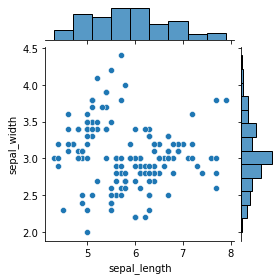

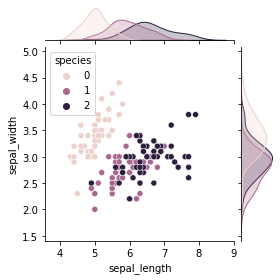

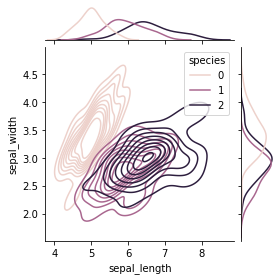

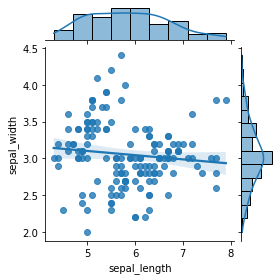

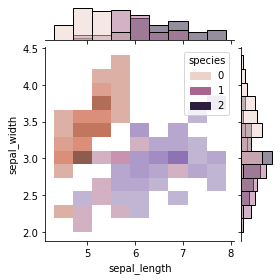

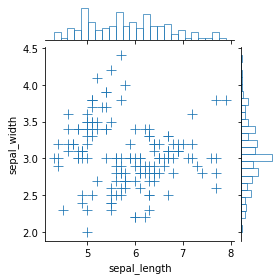

In [10]:
## joinplot is a scatter with histograms about the features

#creating subplot
# fig, axes = plt.subplots(2, 3, sharey = True)

#fig.suptitle('JoinPlot')

# 1
sns.jointplot(data= data, x="sepal_length", y="sepal_width", height = 4)
# 2
sns.jointplot(data= data, x="sepal_length", y="sepal_width", hue="species", height = 4)
# 3
sns.jointplot(data= data, x="sepal_length", y="sepal_width", hue="species", kind="kde", height = 4)
# 4
sns.jointplot(data= data, x="sepal_length", y="sepal_width", kind="reg", height = 4)
# 5
sns.jointplot(data= data, x="sepal_length", y="sepal_width", hue="species", kind="hist", height = 4)
# 6
sns.jointplot(data= data, x="sepal_length", y="sepal_width", marker="+", s=100, marginal_kws=dict(bins=25, fill=False), height = 4)


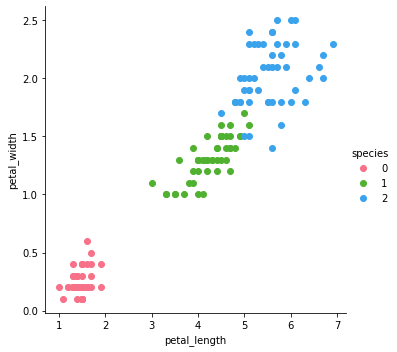

In [11]:
# scatter from seaborn (FacetGrid)

sns.FacetGrid(data, hue="species", palette="husl", height=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

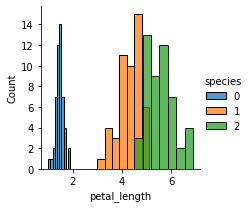

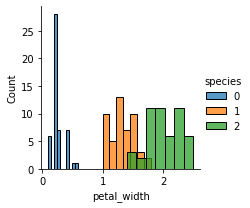

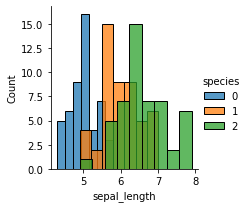

In [12]:
#histplot each flower to a histogram

sns.FacetGrid(data,hue="species",height=3).map(sns.histplot,"petal_length").add_legend()
sns.FacetGrid(data,hue="species",height=3).map(sns.histplot,"petal_width").add_legend()
sns.FacetGrid(data,hue="species",height=3).map(sns.histplot,"sepal_length").add_legend()

plt.show()

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

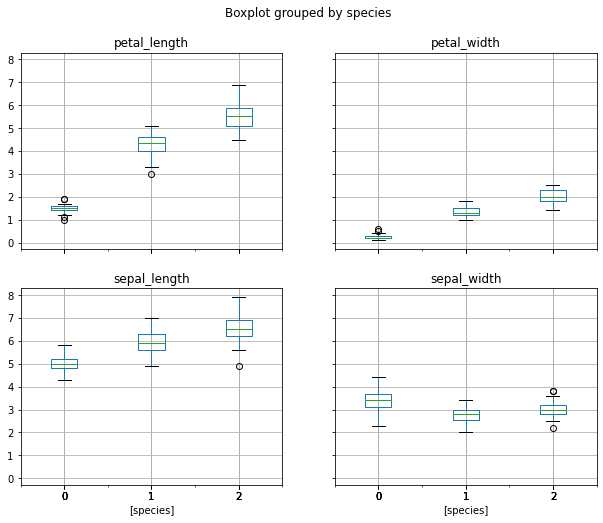

In [13]:
#Box Plot for each specie

data.boxplot(by="species", figsize=(10, 8))

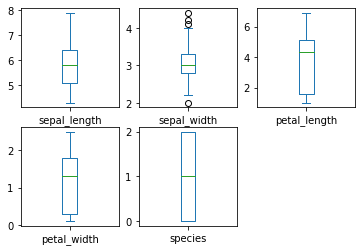

In [14]:
# Box and whisker plots(Give idea about distribution of input attributes)

data.plot(kind = 'box', subplots = True, layout = (2, 3), sharex = False, sharey = False)
plt.show()

<AxesSubplot:xlabel='species', ylabel='petal_length'>

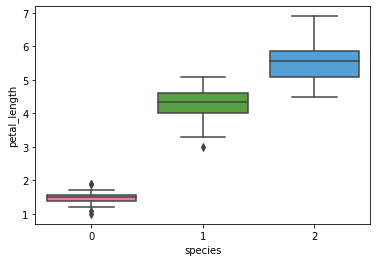

In [15]:
#Another BoxPlot
sns.boxplot(x="species", y="petal_length", palette="husl", data=data)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

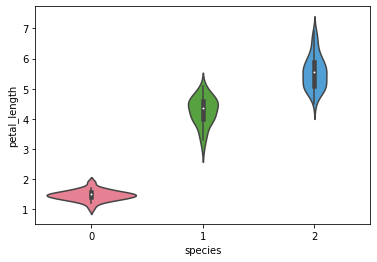

In [16]:
# Violin Plot

sns.violinplot(x="species", y="petal_length", palette="husl", data=data)

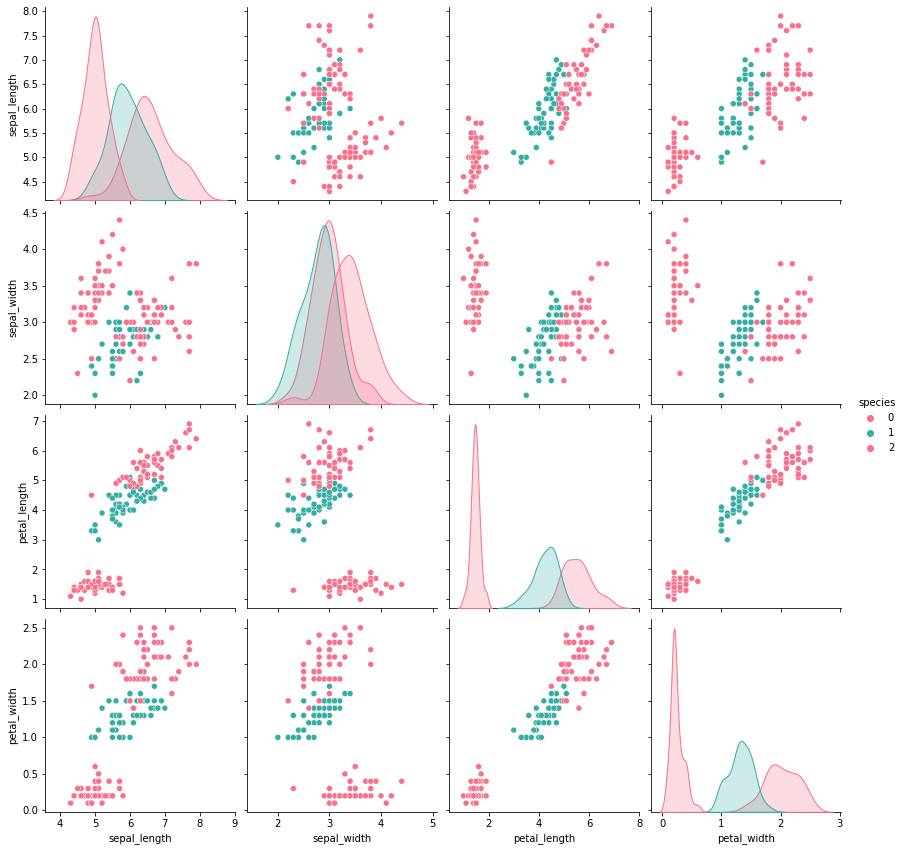

In [17]:
# 
sns.pairplot(data, hue="species", palette="husl", height=3)

<AxesSubplot:>

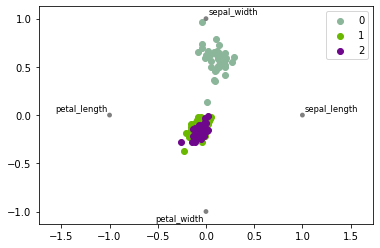

In [18]:
from pandas.plotting import radviz

# radial vision plot

radviz(data, "species")

# Data Normalization

In [19]:
#Creating X and Y to use in Machine Learning Algorithms
x = data.iloc[:,0:4]
X = preprocessing.normalize(x)

y = data.iloc[:,4]

In [20]:
print('=============================================')
print('After Normalization')
print('=============================================')
print('X')
print('Type: ',type(X))
print('Shape: ', X.shape)
print('Max Value: ', round(X.max(), 3))
print('Min Value: ', round(X.min(), 3))
print('=============================================')
print('y')
print('Type: ',type(y))
print('Shape: ',y.shape)
print('=============================================')

After Normalization
X
Type:  <class 'numpy.ndarray'>
Shape:  (150, 4)
Max Value:  0.861
Min Value:  0.015
y
Type:  <class 'pandas.core.series.Series'>
Shape:  (150,)


# Machine Learning Models & Training

In [21]:
from sklearn.model_selection import train_test_split

#Train/Test Simples data Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [22]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

## Creating models to apply to data train/test

score = 'accuracy'

def models(X_train, Y_train, score):
    clfs = []
    result = []
    names = []
    clfs.append(('LR', LogisticRegression())) 
    clfs.append(('LDA', LinearDiscriminantAnalysis()))
    clfs.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
    clfs.append(('CART', DecisionTreeClassifier()))
    clfs.append(('NB', GaussianNB()))
    clfs.append(('SVM', SVC()))
    clfs.append(('KMS', KMeans(n_clusters=3)))
    for algo_name, clf in clfs:
        k_fold = model_selection.KFold(n_splits=10, random_state=None)
        cv_score = model_selection.cross_val_score(clf, X_train, Y_train, cv=k_fold, scoring=score)
        result.append((algo_name,cv_score.mean(), cv_score.std()))
        names.append(algo_name)
    return (result)


print('Train Score')
print('Model, Mean, Std')
print('=============================================')
models(x_train, y_train, score)

Train Score
Model, Mean, Std


[('LR', 0.7423076923076923, 0.14713481418161353),
 ('LDA', 0.9478021978021978, 0.03424712536757673),
 ('KNN', 0.9703296703296704, 0.03638009968625679),
 ('CART', 0.9406593406593406, 0.054103444505895264),
 ('NB', 0.9631868131868131, 0.04877747059333228),
 ('SVM', 0.956043956043956, 0.04808869557591443),
 ('KMS', 0.18241758241758244, 0.19919836931895551)]

## Best Parameters

### KNN best parameter

In [23]:
#GridSearchCV for n_neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_parameters = {"n_neighbors": range(1, 100)}
knn_gridsearch = GridSearchCV(KNeighborsRegressor(), knn_parameters)
knn_gridsearch.fit(x_train, y_train)
knn_gridsearch.best_params_

{'n_neighbors': 3}

### K-Means best parameter

c:\Users\Pichau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


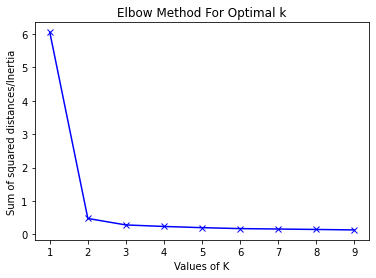

In [35]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_train)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

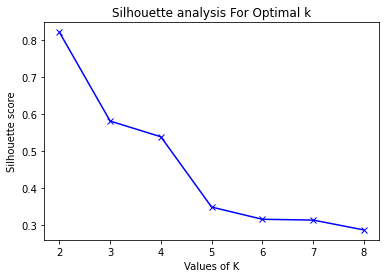

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_train)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(x_train, cluster_labels))


plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

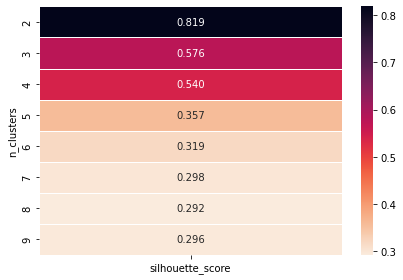

In [26]:
clusters_range = range(2,10)
results = []

for c in clusters_range:
    clusterer = KMeans(n_clusters=c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    results.append([c,silhouette_avg])
    
result = pd.DataFrame(results, columns=['n_clusters','silhouette_score'])
pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Predictions

### SVM Prediction

Accuracy:  100.0 %
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



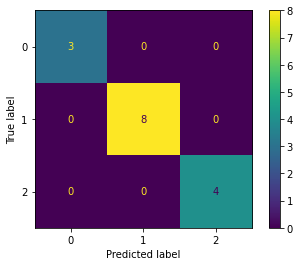

In [37]:
## Evaluation of the SVM Classifier 
# Predictions on test dataset
svm = SVC()
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)
print('Accuracy: ', 100*(accuracy_score(y_test, pred_svm)), '%')
print('Classification Report: ', classification_report(y_test, pred_svm))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pred_svm)

### KNN Prediction

Accuracy:  100.0 %
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



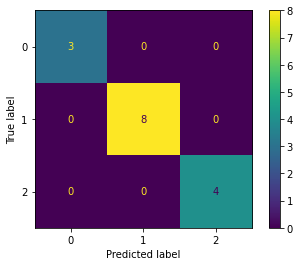

In [45]:
## Evaluation of the SVM Classifier

# Predictions on test dataset

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print('Accuracy: ', 100*(accuracy_score(y_test, pred_knn)), '%')
print('Classification Report: ',classification_report(y_test, pred_knn))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pred_knn)

### KMeans Prediction

Accuracy:  20.0 %
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4

    accuracy                           0.20        15
   macro avg       0.33      0.33      0.33        15
weighted avg       0.20      0.20      0.20        15



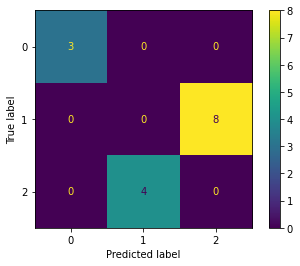

In [44]:
# Kmeans has the wrost result, but only for observe the predicted results

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train, y_train)
pred_kmeans = kmeans.predict(x_test)
print('Accuracy: ', 100*(accuracy_score(y_test, pred_kmeans)), '%')
print('Classification Report: ',classification_report(y_test, pred_kmeans))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pred_kmeans)

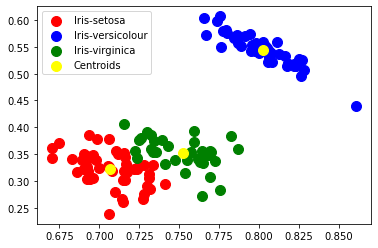

In [38]:
from sklearn.cluster import KMeans

### Plotting KMeans Decision

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_train)

plt.scatter(x_train[y_kmeans == 0, 0], x_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x_train[y_kmeans == 1, 0], x_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x_train[y_kmeans == 2, 0], x_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc = 'best')

### Decision Tree Plot

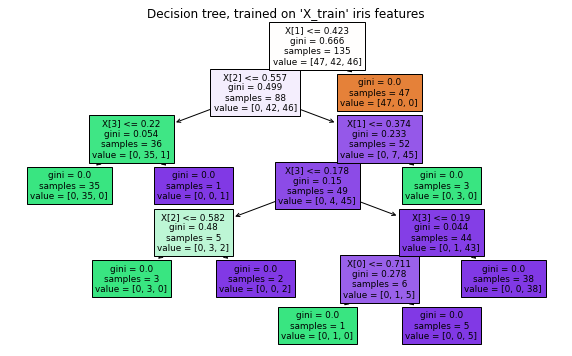

In [48]:
from sklearn.tree import plot_tree

### Decision Tree Plot

plt.figure(figsize=(10,6))
clf = DecisionTreeClassifier().fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree, trained on 'X_train' iris features")
plt.show()

# Thank You! :)